# Importing Dependencies

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Analysing the Data

In [2]:
house_data=pd.read_csv("house_data.csv")

In [4]:
house_data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [6]:
house_data.shape

(4600, 18)

In [7]:
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
house_data = house_data.drop('date',axis=1)
house_data = house_data.drop('statezip',axis=1)

In [9]:
house_data.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
country           object
dtype: object

In [10]:
house_data["price"]=house_data["price"].astype(int)
house_data["bedrooms"]=house_data["price"].astype(int)
house_data["bathrooms"]=house_data["price"].astype(int)
house_data["floors"]=house_data["price"].astype(int)

# LabelEncoding

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
house_data["street"]=LE.fit_transform(house_data["street"])
house_data["city"]=LE.fit_transform(house_data["city"])
house_data["country"]=LE.fit_transform(house_data["country"])

In [12]:
house_data.dtypes

price            int32
bedrooms         int32
bathrooms        int32
sqft_living      int64
sqft_lot         int64
floors           int32
waterfront       int64
view             int64
condition        int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
street           int32
city             int32
country          int32
dtype: object

In [13]:
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
country          0
dtype: int64

# Importing Matplotlib and Seaborn to plot the Graphs

In [14]:
import matplotlib.pyplot as plp
import seaborn as sns

<AxesSubplot:xlabel='yr_built', ylabel='price'>

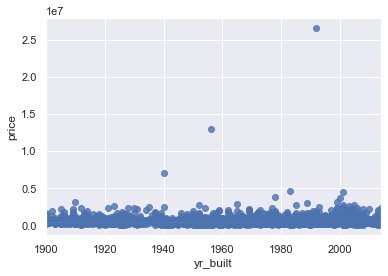

In [15]:
sns.set(style="darkgrid")
sns.regplot(x=house_data['yr_built'], y= house_data["price"])

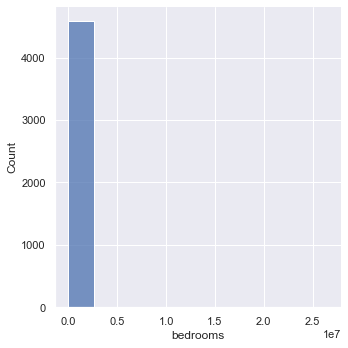

In [16]:
sns.displot(house_data["bedrooms"],bins=10)

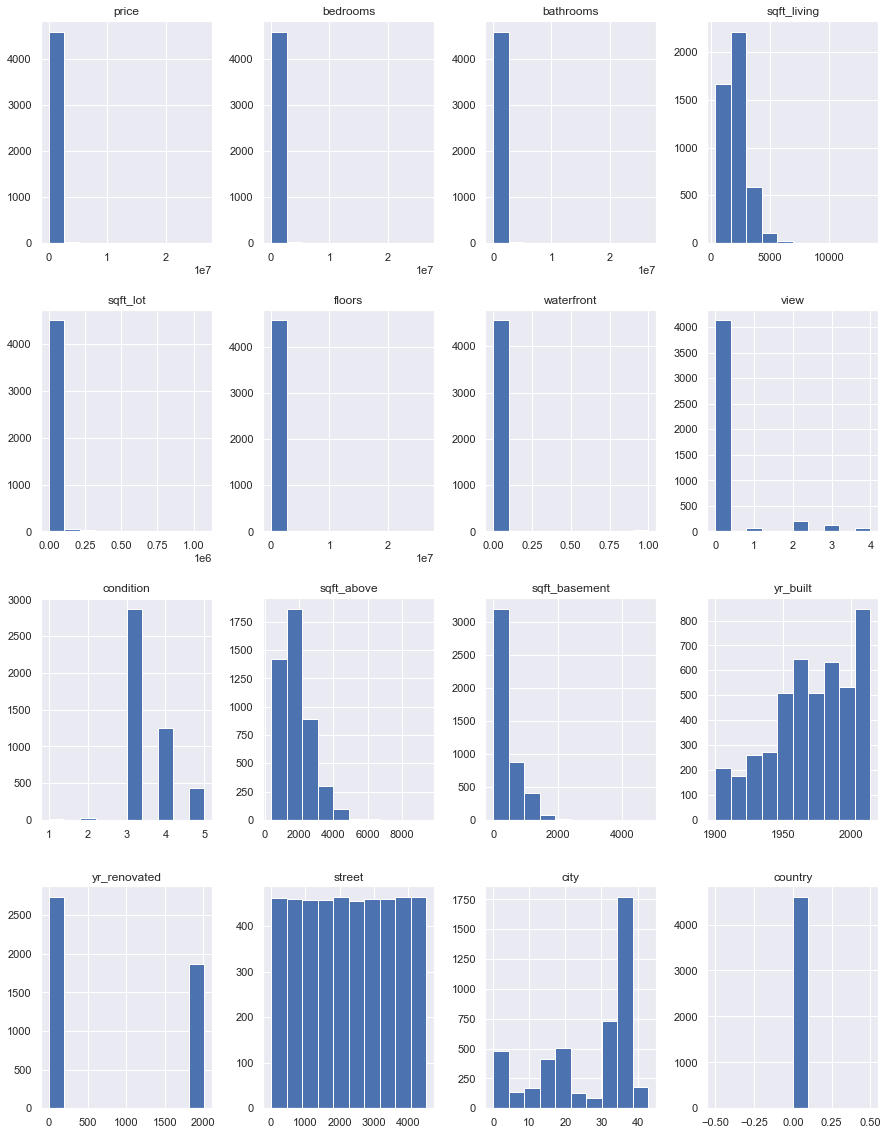

In [17]:
house_data.hist(figsize=(15,20))
plp.show()

<AxesSubplot:xlabel='price', ylabel='city'>

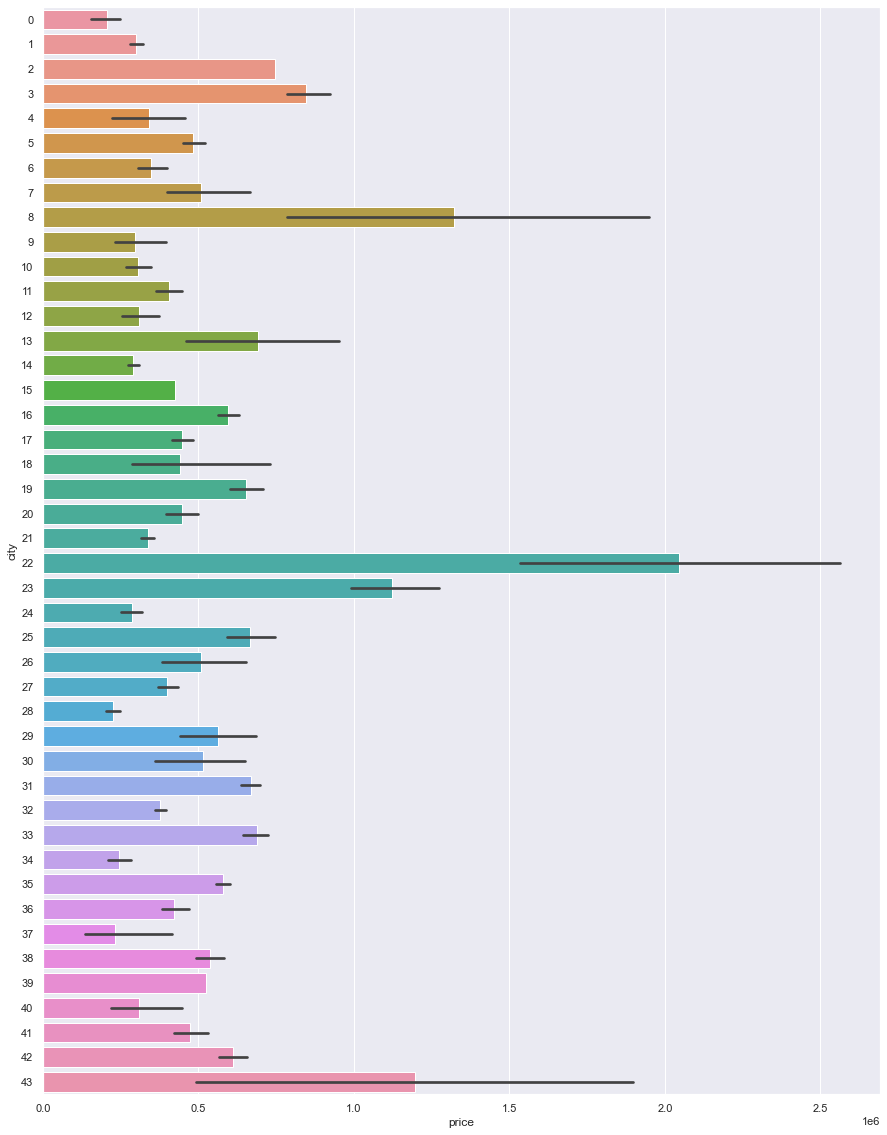

In [18]:
plp.figure(figsize=(15,20))
sns.barplot(data=house_data,y='city',x='price',orient="h3")

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

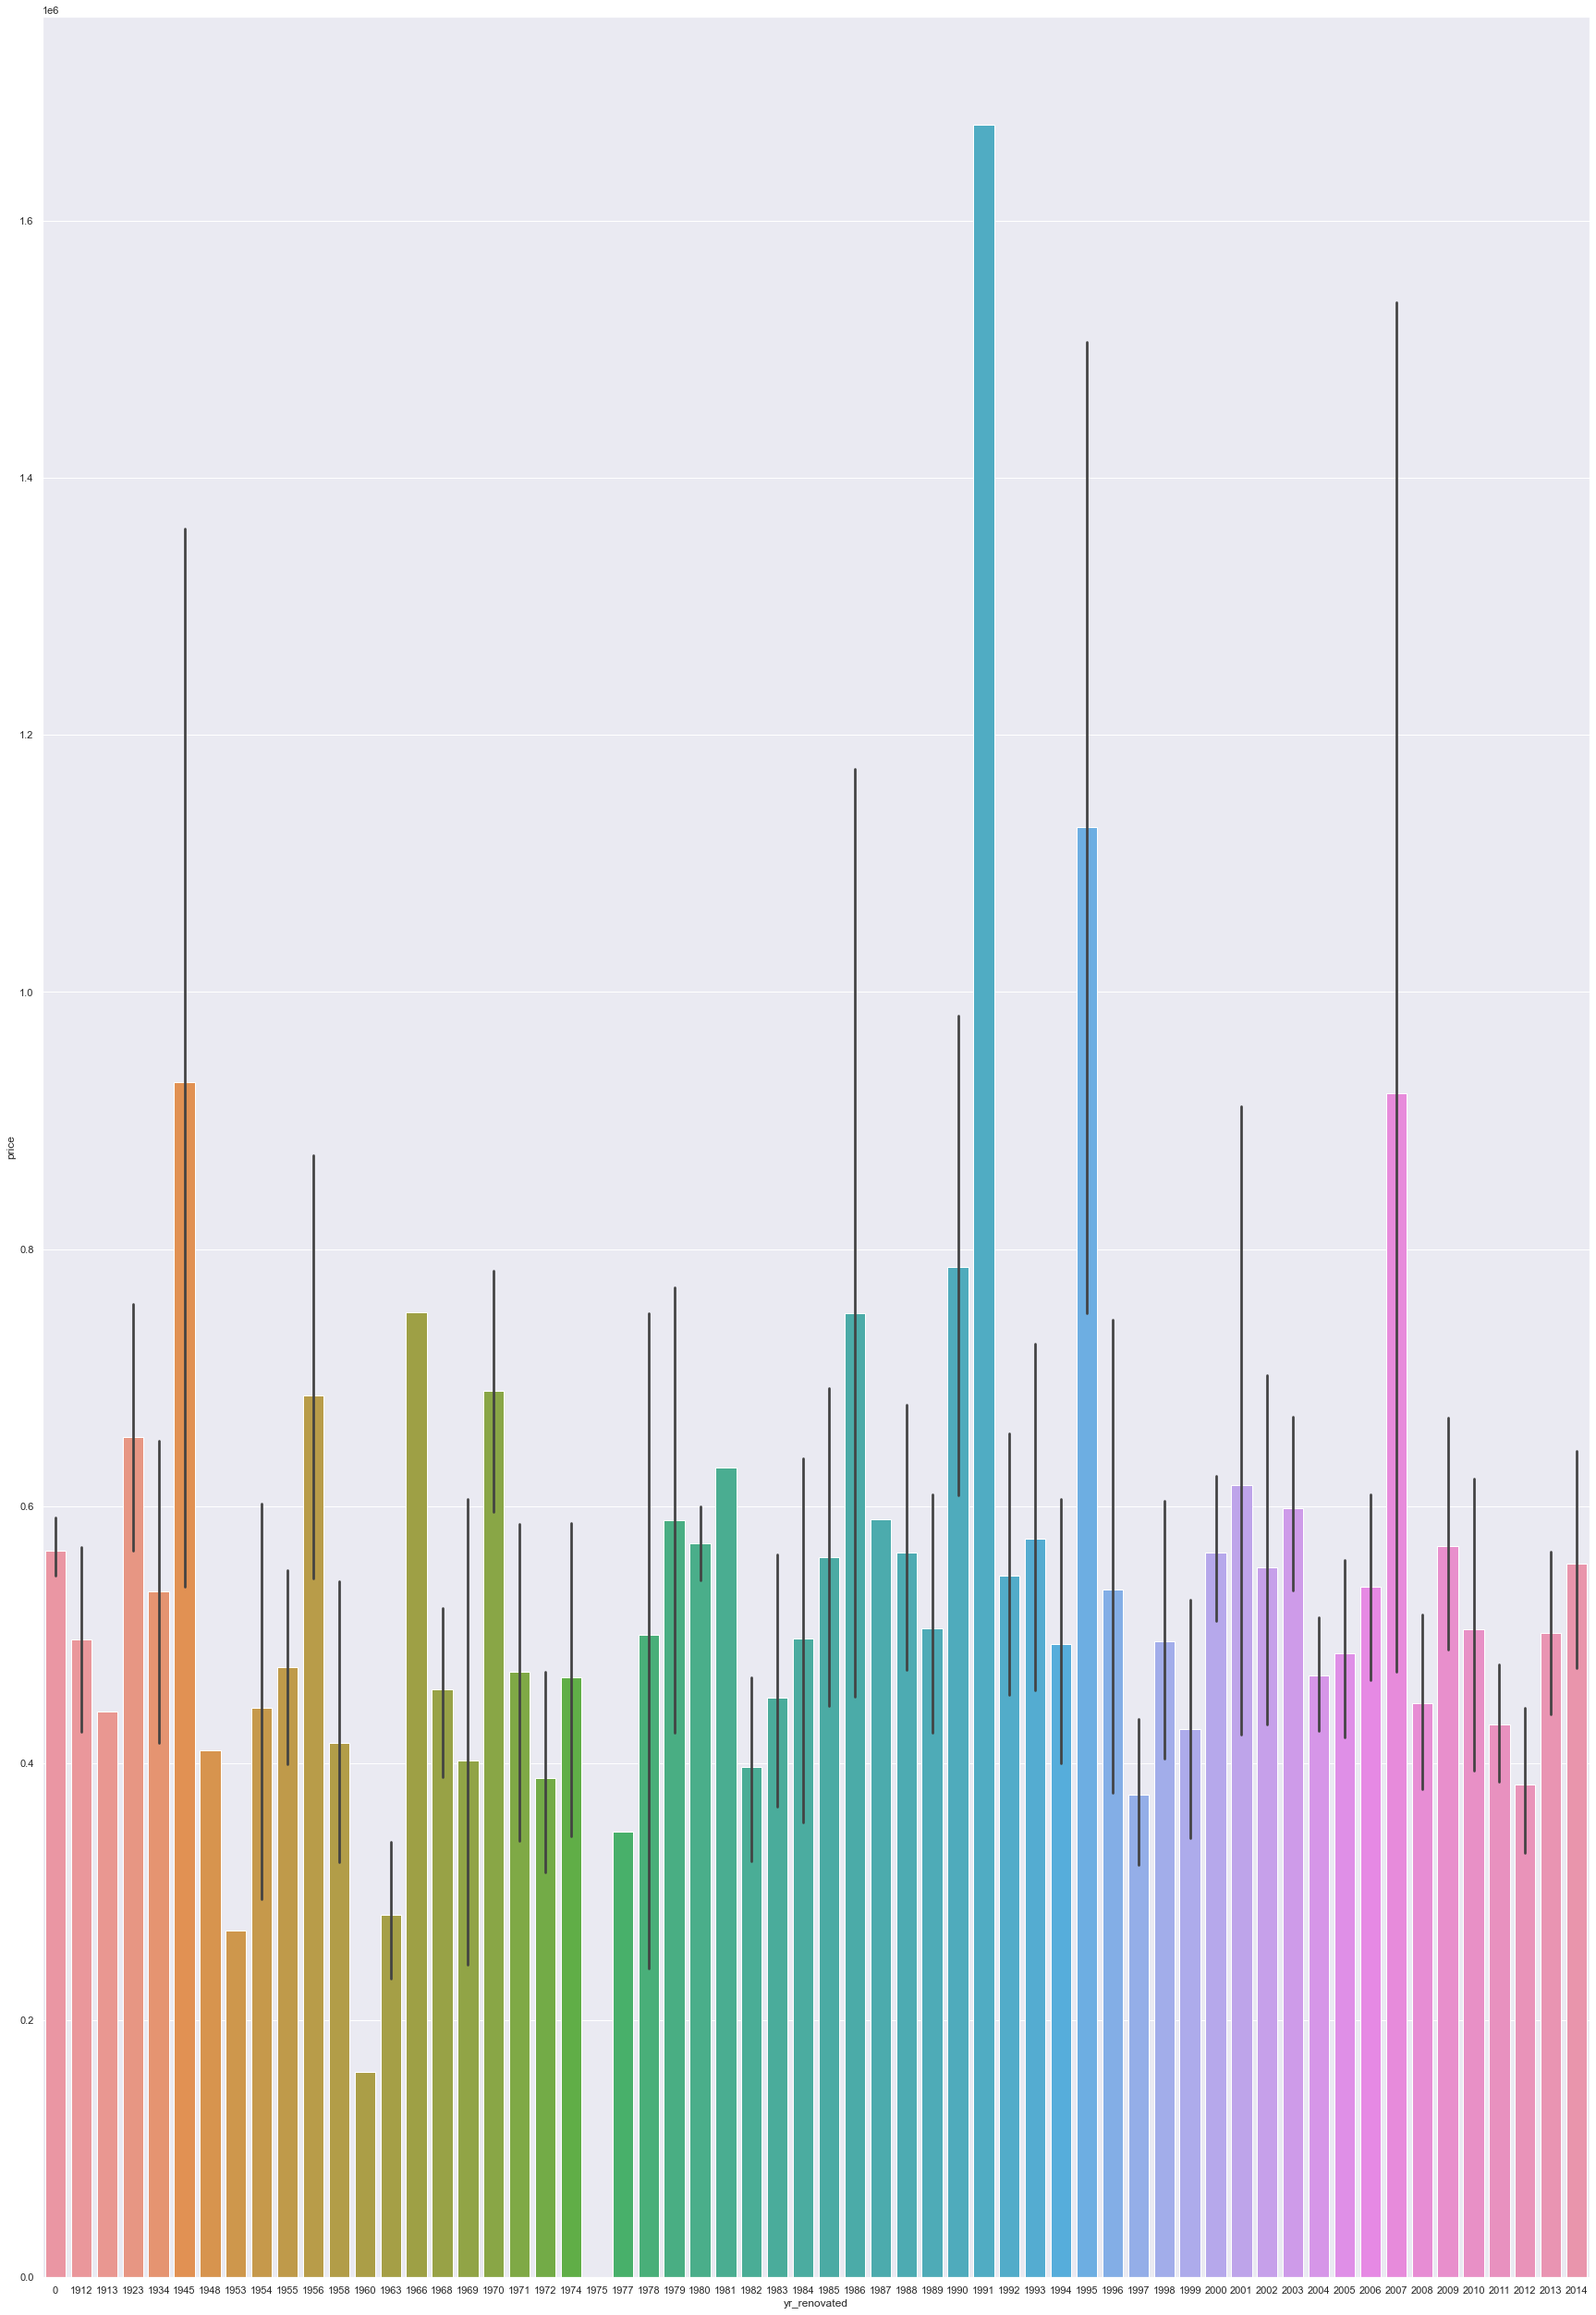

In [19]:
plp.figure(figsize=(30,45))
sns.barplot(x=house_data["yr_renovated"],y=house_data["price"])

<AxesSubplot:>

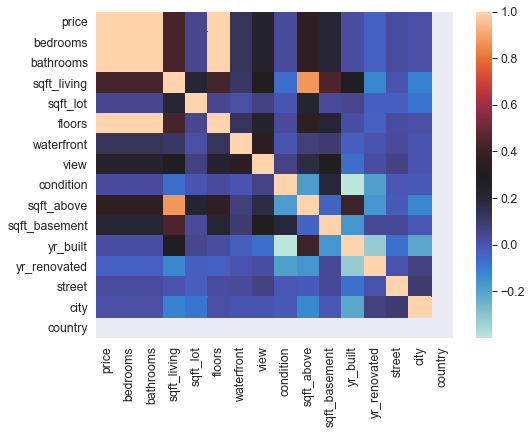

In [20]:
plp.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
house_data2=house_data.corr()
sns.heatmap(house_data2,cmap="icefire")

In [21]:
X = house_data.drop('price',axis =1).values
y = house_data['price'].values

# Training the Model

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Applying Linear Regression Model 

In [23]:
from sklearn.linear_model import LinearRegression 
regg=LinearRegression()
regg.fit(X_train, y_train)
y_pred=regg.predict(X_test)

# Applying R2 Score to check the Accuracy

In [25]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
acc

1.0